In [1]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from scipy.stats.mstats import gmean
#from cachier import cachier

#@cachier(stale_after=datetime.timedelta(hours=12))
def get_source_data(url: str) -> pd.DataFrame:
    return pd.read_csv(url)

csvcases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

csv = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df = get_source_data(csv)
df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)

dfcases = get_source_data(csvcases)
dfcases = dfcases.drop(['Province/State', 'Lat', 'Long'], axis=1)

today = datetime.datetime.utcnow().strftime('%Y-%m-%d')

# initialization for charts
params = {'axes.titlesize': 'large',
          'legend.fontsize': 'medium',
          'figure.figsize': (10, 5),
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.titlesize': 'large'}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')


In [2]:
dfg = df.groupby(['Country/Region']).sum()
# filter only countries with large last series values
# dfg = dfg[dfg.iloc[:,-1]>10]
dfg.columns = pd.to_datetime(dfg.columns)


dfgcases = dfcases.groupby(['Country/Region']).sum()
# filter only countries with large last series values
dfgcases = dfgcases[dfgcases.iloc[:,-1]>100]
dfgcases.columns = pd.to_datetime(dfgcases.columns)

In [3]:
c = dfgcases.columns
HORIZON = 10
# filter last ten days only
dfp = dfgcases.drop(c[0:len(c)-HORIZON], axis=1)
# filter only countries with starting cases more than 100
dfp = dfp[dfp.iloc[:,0]>100]

dfpcoefs : pd.DataFrame = dfp

# add day-by-day increases
for i in range(1,HORIZON):
    c = dfpcoefs.columns
    # kwargs = {'f'+str(i) : lambda x: (x[c[-i]]-x[c[-i-1]]) / x[c[-i-1]]}
    # dfpcoefs = dfpcoefs.assign(**kwargs)
    dfpcoefs['day-'+str(i)] = (dfpcoefs[c[-i]]-dfpcoefs[c[-i-1]]) / dfpcoefs[c[-i-1]]
    dfpcoefs = dfpcoefs.drop(dfpcoefs.columns[-i-1] , axis = 1)

dfpcoefs = dfpcoefs.drop(dfpcoefs.columns[0] , axis = 1)
 
#filter only countries with no missing data
dfpcoefs['NONZERO'] = dfpcoefs.astype(bool).sum(axis=1)
dfpcoefs = dfpcoefs.query('NONZERO>=9')
dfpcoefs.drop('NONZERO', axis=1, inplace=True)

dfpcoefs['ROWMEAN'] = gmean(dfpcoefs + 1, axis = 1) - 1

# filter only the top countries by average daily increase of new cases
# as this is day-to-day increase, it needs to be geometrical mean
dpfcoefT = dfpcoefs.sort_values(by = 'ROWMEAN', ascending = False).head(25).T

# calculate the daily mean increase in cases
# this is average over countries, so it is arithmetical mean
dpfcoefT['COLMEAN'] = dpfcoefT.mean(axis = 1)
dpfcoefT.T

day-1     day-2     day-3     day-4     day-5  \
Country/Region                                                          
Laos                 0.019325  0.017820  0.012990  0.016993  0.021661   
New Zealand          0.014671  0.012698  0.011533  0.016340  0.013135   
Vietnam              0.011718  0.011414  0.011377  0.010803  0.013601   
Norway               0.014113  0.015334  0.011026  0.006640  0.007349   
Germany              0.012738  0.011730  0.008743  0.004035  0.007841   
Austria              0.008937  0.007107  0.007457  0.009250  0.010410   
Slovakia             0.010564  0.008996  0.006633  0.007923  0.010486   
Korea, South         0.011633  0.011448  0.006821  0.007494  0.008989   
Trinidad and Tobago  0.009221  0.010808  0.006587  0.006544  0.009738   
Denmark              0.010522  0.008645  0.009298  0.009151  0.007872   
Netherlands          0.006927  0.008343  0.008135  0.008467  0.008500   
Croatia              0.009387  0.006384  0.001709  0.005565  0.009255   
Ireland              0.006648  0.009666  0.008219  0.006714  0.008687   
Greece               0.006595  0.008291  0.007222  0.004152  0.006405   
Australia            0.008041  0.006740  0.005255  0.005553  0.005973   
Poland               0.008213  0.005425  0.003744  0.005900  0.007566   
Slovenia             0.005379  0.005939  0.002485  0.003554  0.005401   
Singapore            0.005001  0.004702  0.004204  0.002855  0.006776   
Georgia              0.005273  0.006008  0.002330  0.003990  0.004882   
Jordan               0.005291  0.005245  0.006001  0.004271  0.002855   
France               0.006488  0.006108  0.001107  0.004107  0.004846   
United Kingdom       0.004660  0.003953  0.004202  0.003599  0.003934   
Lithuania            0.004127  0.003851  0.001270  0.002769  0.004404   
Ukraine              0.003494  0.003118  0.001809  0.002303  0.004214   
Latvia               0.004065  0.003684  0.001248  0.001937  0.003661   
COLMEAN              0.008521  0.008138  0.006056  0.006436  0.007938   

                        day-6     day-7     day-8     day-9   ROWMEAN  
Country/Region                                                         
Laos                 0.022430  0.022851  0.020719  0.020947  0.019522  
New Zealand          0.013495  0.016404  0.016965  0.020781  0.015110  
Vietnam              0.011221  0.010772  0.010325  0.035419  0.014044  
Norway               0.011566  0.011814  0.018536  0.006196  0.011389  
Germany              0.011566  0.013328  0.014330  0.012489  0.010751  
Austria              0.011043  0.012409  0.014228  0.008887  0.009967  
Slovakia             0.010808  0.011882  0.012141  0.010242  0.009962  
Korea, South         0.009395  0.009089  0.009262  0.009776  0.009322  
Trinidad and Tobago  0.010544  0.009222  0.010287  0.010288  0.009248  
Denmark              0.008841  0.009513  0.009697  0.009468  0.009223  
Netherlands          0.008290  0.008711  0.009404  0.009194  0.008441  
Croatia              0.009270  0.010718  0.010641  0.008616  0.007946  
Ireland              0.008446  0.008785  0.007229  0.006848  0.007915  
Greece               0.007269  0.007277  0.007944  0.009420  0.007174  
Australia            0.007210  0.007990  0.007555  0.007296  0.006846  
Poland               0.007802  0.008262  0.008417  0.005937  0.006806  
Slovenia             0.005745  0.006554  0.007759  0.008441  0.005694  
Singapore            0.004212  0.004951  0.008139  0.007025  0.005317  
Georgia              0.005484  0.005266  0.003908  0.006246  0.004820  
Jordan               0.004375  0.004614  0.004908  0.004949  0.004723  
France               0.004524  0.004417  0.004320  0.004055  0.004440  
United Kingdom       0.004945  0.004715  0.004301  0.004327  0.004293  
Lithuania            0.004608  0.004265  0.004733  0.004104  0.003792  
Ukraine              0.004735  0.005062  0.004360  0.003948  0.003671  
Latvia               0.003494  0.004397  0.005162  0.005246  0.003654  
COLMEAN              0.008453  0.00

In [4]:
dfpcoefs.loc["Bulgaria"]

day-1      0.003029
day-2      0.003872
day-3      0.004381
day-4      0.001057
day-5      0.001772
day-6      0.003633
day-7      0.003472
day-8      0.003778
day-9      0.004777
ROWMEAN    0.003307
Name: Bulgaria, dtype: float64

<AxesSubplot:>

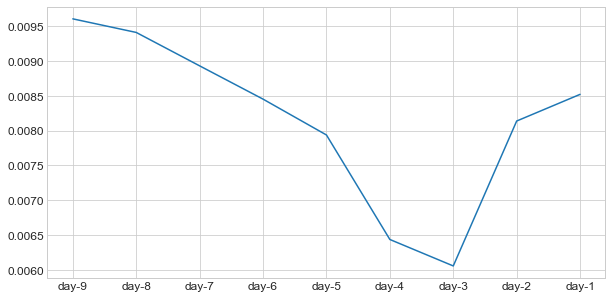

In [5]:
# general trend in the percentile increase of total cases 
dpfcoefT.iloc[0:-1,]['COLMEAN'][::-1].plot()


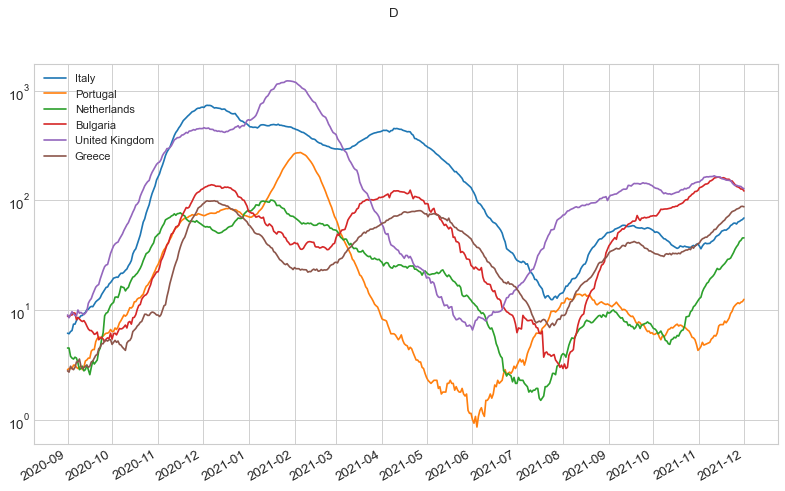

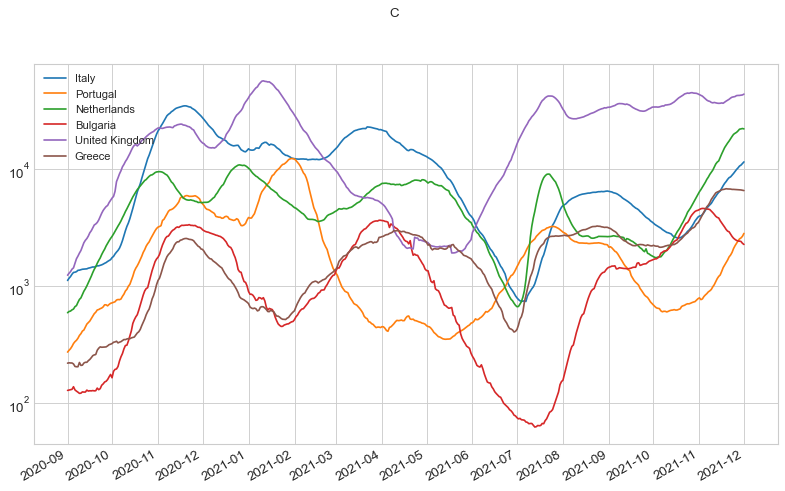

In [11]:
def plot_countries(cntr: list, dataset, title: str):
    fig = plt.figure(figsize=(12, 7), dpi=80)
    fig.suptitle(title)

    ax : plt.Axes = fig.add_subplot(111)
    # To enable log scale uncomment below
    ax.set_yscale('log')

    # monthly xaxis ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    for cntry in cc:
        #seven day rolling average of daily deaths
        plotdata = (
            dataset.loc[cntry]
            .loc['2020-08-01':today].diff().rolling(window=14).mean()
            .loc['2020-09-01':today].to_frame()
        )
        line, = ax.plot(plotdata)
        line.set_label(cntry)

    ax.legend(loc='upper left')
    fig.autofmt_xdate()
    plt.show()


cc = ['Italy', 'Portugal', 'Netherlands', 'Bulgaria', 'United Kingdom', 'Greece']
plot_countries(cc, dfg, "D")
plot_countries(cc, dfgcases, "C")

In [7]:
dfg.loc["Bulgaria"].loc['2021-06-01':today].diff().rolling(window=7).mean().round().tail(20)

2021-11-12    169.0
2021-11-13    169.0
2021-11-14    172.0
2021-11-15    164.0
2021-11-16    160.0
2021-11-17    155.0
2021-11-18    148.0
2021-11-19    143.0
2021-11-20    141.0
2021-11-21    139.0
2021-11-22    136.0
2021-11-23    140.0
2021-11-24    134.0
2021-11-25    129.0
2021-11-26    125.0
2021-11-27    123.0
2021-11-28    121.0
2021-11-29    117.0
2021-11-30    114.0
2021-12-01    109.0
Name: Bulgaria, dtype: float64

In [8]:
dfgcases.loc["Bulgaria"].loc['2021-06-01':today].diff().tail(20)

2021-11-12    3146.0
2021-11-13    1610.0
2021-11-14     828.0
2021-11-15    3223.0
2021-11-16    3869.0
2021-11-17    2839.0
2021-11-18    2785.0
2021-11-19    2737.0
2021-11-20    1455.0
2021-11-21     733.0
2021-11-22    3462.0
2021-11-23    3233.0
2021-11-24    2569.0
2021-11-25    2370.0
2021-11-26    2488.0
2021-11-27    1218.0
2021-11-28     728.0
2021-11-29    3020.0
2021-11-30    2681.0
2021-12-01    2105.0
Name: Bulgaria, dtype: float64